<div class="alert alert-info"><big><b>Reviewer's comment</b></big><br>Hi, Erik! 👋<br><br> My name is Dmitry Kirsanov. You can find my comments beggining with the words "Reviewer's comment". The background of my comments has the following meaning: 

* <span class="alert-success">green means that all good (✔️) or even excellent (👍). Pieces of advice (📝) have the same color;</span>
* <span class="alert-warning">with yellow goes recommendations (💡) and some uncritical errors (⚠️);</span>
* <span class="alert-danger">red color marks places where some work is needed (🔧), critical errors (🚫) or crucial questions (👀).</span>

To make it easy to find places that need improvement I'll cross out comments or change their color after iterations of successful work. Please don't delete my comments.
    
I suggest marking your comments with code <code>&lt;div class=&quot;alert btn-primary&quot;&gt;&lt;b&gt;Student comment:&lt;/b&gt;&lt;br&gt;      &lt;/div&gt;</code> to make them noticeable: <div class="alert btn-primary"><b>Student comment:</b><br>      </div>

<div class="alert btn-primary"><b>Student comment:</b><br>  Hi Dmitry, thank you for the review. I've made the adjustements and incorported your suggestions. I've also put a comment directly next to the original comment where changes were made, but the changes themselves may be reflected a few lines above or below. Much appreciated.   </div>

![Well done](https://i.gifer.com/embedded/download/EbNG.gif "Well done!")

<div class="alert alert-success"><b>Reviewer's comment 2</b>&nbsp;✔️<br>
All done. But you still need to train your ability to show many boxplots on one plot.
</div>

## Introduction

The goal of this project is to observe trends in games within the current market. We have data starting from 2016 and going back to 1980, with parameters including the names of each game, reviews, platforms, genres, ESRB rating, and region specific sales. The distributions by each parameter will be analyzed and statistically evalueated, and we will try to extract insights to project into 2017.

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-success"><b>Reviewer's comment</b>&nbsp;👍<br>
It's good that you have all the imports at the beginning of your work. 
    
Libraries <tt>pandas</tt> and <tt>matplotlib</tt> are not <a href='https://docs.python.org/3/library/index.html'>standard</a>. Anyone who will maintain this "ipython" notebook will immediately understand what libraries they need to install. 
</div>

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-success"><b>Reviewer's comment</b>&nbsp;👍<br>It's good that you use <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html'>string accessor methods</a>, there are many useful functions.</div>

In [5]:
df.duplicated().sum()

0

Convert user_score to float64

In [6]:
text = []
for score in df.user_score:
    try:
        df['user_score'][score] = float(score)
    except ValueError:
        text.append(score)


In [7]:
text_series = pd.Series(data = text)
text_series.head()

0    tbd
1    tbd
2    tbd
3    tbd
4    tbd
dtype: object

In [8]:
text_series.nunique()

1

The only unique values in 'user_score' that isnt a number/NaN is the string 'tbd'. So, we will convert all the values to a number and coerce errors.

In [9]:
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')
df['user_score'].head()

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64

<div class="alert alert-success"><b>Reviewer's comment</b>&nbsp;✔️<br>
Here TBD means "To Be Determined" and it's correct to replace it with NaN value.
</div>

Lets make a total sales column:

In [10]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [11]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<div class="alert alert-success"><b>Reviewer's comment</b>&nbsp;📝<br>You can use vector function here:
    
    df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
</div>

#### Missing values

In [12]:
df.isnull().sum()*100/len(df)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
total_sales         0.000000
dtype: float64

<div class="alert alert-success"><b>Reviewer's comment</b>&nbsp;📝<br>
If you want to see a percentage, it's better to change the format of numbers without multiplying them by 100
</div>

In [13]:
# REVIEWER CODE
np.trim_zeros(df.isna().mean().sort_values(ascending=False))\
  .to_frame(name="Missing").style.format("{:.2%}")

,Missing
user_score,54.59%
critic_score,51.32%
rating,40.48%
year_of_release,1.61%
name,0.01%
genre,0.01%


In [14]:
df[df['name'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [15]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53


In [16]:
df[df['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67


In [17]:
df[df['user_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67


In [18]:
df[df['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67


<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;⚠️<br>
Here you might want to say something about the missing values we were looking at.
</div>

The columns containing the critic score, user score, and rating have a large amount of null data. At a glance it seems that much of the missing data contains missing info in all three columns at the same entry.

<div class="alert alert-success"><b>Reviewer's comment 2</b>&nbsp;📝<br>
There are some rows, where info is missing only partially. We can suggest that info about scores and ratings was taken from different databases.
</div>

In [19]:
# REVIEWER CODE 2
df[df[['critic_score','user_score','rating']].isna().std(axis=1).ne(0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,NaN,E,6.70
182,Tomb Raider II,PS,1997.0,Action,2.30,2.46,0.20,0.28,85.0,NaN,T,5.24
255,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M,4.36
263,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M,4.28
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.00,53.0,NaN,E,0.01
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.00,48.0,NaN,E,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01


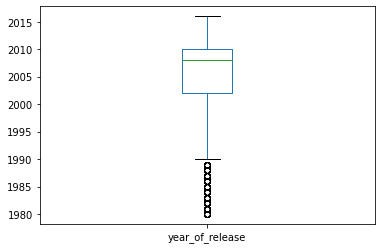

In [20]:
null_data = df[df.isna().any(axis = 1)]
null_data.year_of_release.plot(kind = 'box');

In [21]:
null_data.year_of_release.median()

2008.0

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;⚠️<br>
Boxplot is not very informative here. And a median is not a good type of average for categorical data. The mode is better.
</div>

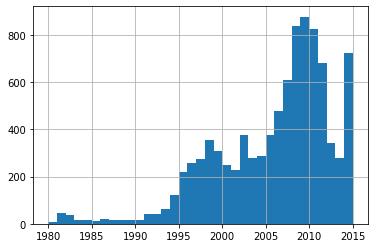

In [22]:
# REVIEWER CODE 2
null_data.year_of_release.hist(bins=range(1980,2016));

A large percentage (more than 50%) of the critic and user scores are missing within the dataset, so it is not viable to drop them. It seems that much of the missing data is from before 2008, so maybe user and critic scores were not very established before then. Imputing is recommended. 

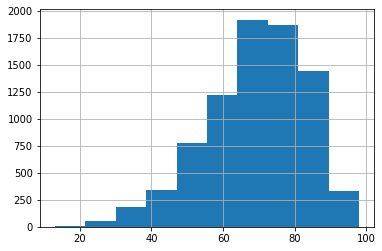

In [23]:
df.critic_score.hist();

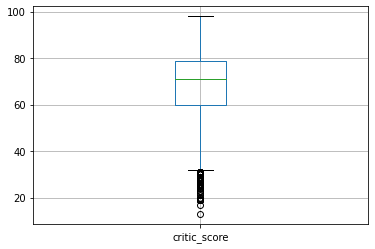

In [24]:
df.boxplot('critic_score');

The missing values for the critic score cannot be directly ascertained from other columns in the data set. The data for critic score is left-skewed, so imputing with the median is recommended. 

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;⚠️<br>
There are different <a href='https://www.ncbi.nlm.nih.gov/books/NBK493614/'>types of missing data</a> with different methods to use with each of them. We can either fill MCAR missing values with one value. We can drop MCAR and MAR values (if there are not many rows affected). But you can't fill MNAR values with one value or drop them without getting a bias.
</div>

In [25]:
df['critic_score'].corr(df['user_score'])

0.5808778320767236

In [26]:
df.critic_score = df.critic_score.fillna(df.critic_score.median())
df.critic_score.isna().sum()

0

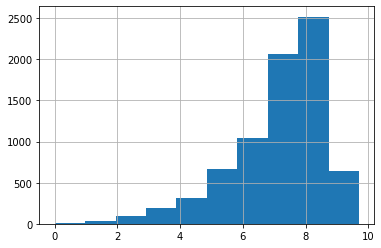

In [27]:
df.user_score.hist();

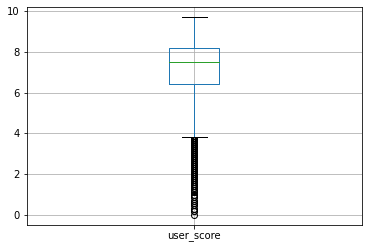

In [28]:
df.boxplot('user_score');

Similar to critic scores, the missing data in user scores cannot be directly predicted from other columns. The data for user score is left-skewed, so imputing with the median is recommended here as well.

In [29]:
df.user_score = df.user_score.fillna(df.user_score.median())
df.user_score.isna().sum()

0

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;👀<br>
Explain why you filled in the missing values in <tt>user_score</tt> and <tt>critic_score</tt> columns. Was there any need for this? Why did we do it? Why do you think the values are missing?
</div>

<div class="alert btn-primary"><b>Student comment:</b><br>  Added explanations above   </div>

<div class="alert alert-warning"><b>Reviewer's comment 2</b>&nbsp;🚫<br>
The first approach in <a href='https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779'>data imputing</a> is "do nothing". If you don't use ML methods then maybe it's OK to have some missing data. With data imputing you can change the correlations between users, critic's scores and other columns of the dataset.
</div>


In [30]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;💡<br>
Ratings 'EC' and 'RP' are rare and can be changed to their more popular versions.
</div>

<div class="alert btn-primary"><b>Student comment:</b><br>  Replaced ratings   </div>

In [31]:
df.rating = df.rating.replace({'EC': 'E', 'K-A': 'E', 'RP': 'M'})
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO'], dtype=object)

<div class="alert alert-success"><b>Reviewer's comment 2</b>&nbsp;👍</div>

In [32]:
df.rating = df.rating.fillna('unknown')
df.rating.isna().sum()

0

In [33]:
df.year_of_release.isna().sum()

269

Percent of missing values is about 1.5%, so it is ok to drop

In [34]:
df = df.dropna(subset = ['year_of_release'])

<div class="alert alert-success"><b>Reviewer's comment</b>&nbsp;📝<br>
Sometimes a year of release is in the name of the game as in "Madden NFL 2004", "FIFA Soccer 2004", and "wwe Smackdown vs. Raw 2006" you display above.
</div>

In [35]:
df.year_of_release.head()

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: year_of_release, dtype: float64

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;💡<br>
<s>There was no need for such conversion to one type and then to another.
</div>

<div class="alert btn-primary"><b>Student comment:</b><br>  Removed redundant conversions   </div>

<div class="alert alert-success"><b>Reviewer's comment 2</b>&nbsp;✔️</div>

In [36]:
df.value_counts('year_of_release').head(10)

year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
dtype: int64

convert year_of_release to int:

In [37]:
df['year_of_release'] = df['year_of_release'].astype('int64')
df.year_of_release

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16446, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Since genre has only 2 more missing values, lets drop those rows as well:

In [39]:
df = df.dropna(subset = ['genre'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [41]:
df.value_counts('platform').head(10)

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
dtype: int64

<div class="alert alert-success"><b>Reviewer's comment</b>&nbsp;✔️<br>
Here is a good place to say what we have done in the section above and that we have enough data for our analysis.
</div>

WIth the data processed and missing values identified and dealt with, we can proceed to analyze the data more in-depth. 

<div class="alert alert-success"><b>Reviewer's comment 2</b>&nbsp;✔️</div>

## Exploratory Data Analysis

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;🔧<br>
Please plot all the data (about every platform) with attention to the question: "<u>how many games were released</u> in different years". Below you showing how many copies of games were solded. 

You may want to count releases of one game on different platforms in one year as one release.
</div>

<div class="alert btn-primary"><b>Student comment:</b><br>   Plotted below   </div>

In [42]:
# REVIEWER CODE
df.year_of_release.agg(['min','max'])

min    1980
max    2016
Name: year_of_release, dtype: int64

In [43]:
year_totals = df.drop_duplicates(['name', 'year_of_release']).groupby('year_of_release')['name'].count().to_frame()
year_totals.head()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


In [44]:
year_totals.sum()

name    12195
dtype: int64

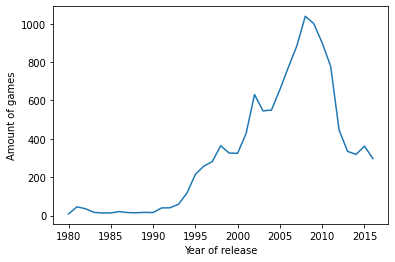

In [45]:
year_totals.plot(legend = False);
plt.xlabel('Year of release');
plt.ylabel('Amount of games');

There is a large peak of games sold at around 2009, and ranging from about 2005 to 2012. The data from 1980 up to about 1993 indicates a conisitently low amount of games sold by comparison. After 1993, the amount of games sold per year across all platforms increase somewhat steadily up to the 2009 peak despite a couple minor declines around 2000 and 2003. After the peak at 2009, there is a sharp decrease leading through 2016.

<div class="alert alert-success"><b>Reviewer's comment 2</b>&nbsp;👍</div>

### Yearly Platform Distributions

In [46]:
sales_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).to_frame()
sales_platform.head()

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


In [47]:
def sales_dist(platforms):
    for platform in platforms:
        data = df.query('platform == @platform')
        data = data.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
        fig = data.plot(kind='bar');
        plt.legend([platform])
        plt.xlabel('Year of Release')
        plt.ylabel('Total Sales')
        plt.show()


<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;⚠️<br><s>Code

    print(fig)

is the reason for rows "AxesSubplot..." below. You may want to remove it and use <tt>plt.show()</tt> instead.
</div>

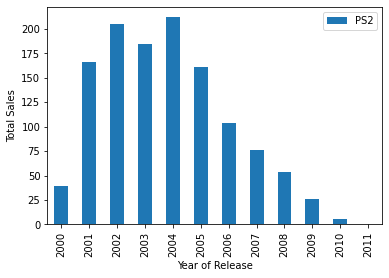

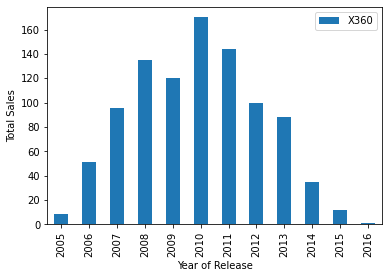

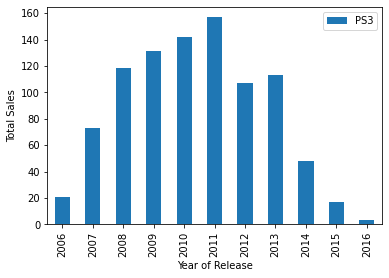

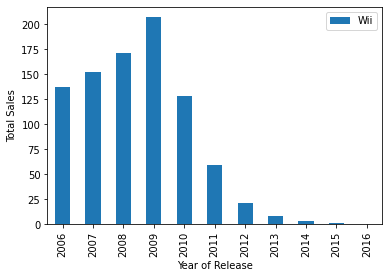

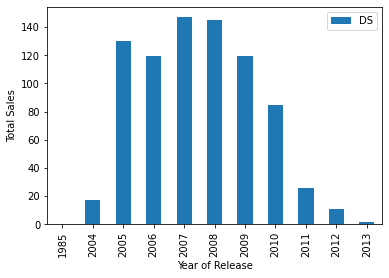

In [48]:
sales_dist(sales_platform.index[0:5])

As seen in the distributions of the top 5 selling platforms across all of our data, the once popular platforms now all currently generate zero or close to zero sales. These are the PS2, the Xbox 360, the PS3, the Wii, and the DS.

According to the top 5 platforms, it seems that generally, the life cycle of a platform is about 10 years. During that span, sales generally follow a normal distribution, so the time it takes to rise in popularity is similar to the time it takes to fade, which is 5 years.

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;🔧<br>
Please find platforms that used to be popular but now have zero sales.
</div>

<div class="alert btn-primary"><b>Student comment:</b><br>   Hopefully answered above   </div>

<div class="alert alert-success"><b>Reviewer's comment 2</b>&nbsp;✔️</div>

<div class="alert alert-success"><b>Reviewer's comment</b>&nbsp;📝<br>
It seems that 10 years is the upper estimate of the platform lifespan.
</div>

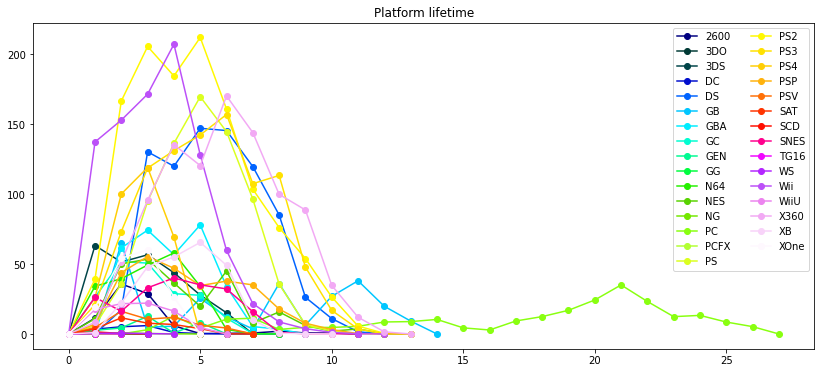

In [49]:
# REVIEWER CODE
df_pivot = df.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
pd.DataFrame([pd.Series([0] + df_pivot[col].reset_index().dropna()[col].to_list() + [0],name=col) 
              for col in df_pivot]).T\
    .plot(figsize=(14, 6), marker='o', cmap='gist_ncar')
plt.title("Platform lifetime")
plt.legend(ncol=2);

Therefore, in order to see which platforms are rising or falling for 2017, lets take the data in the past 5 years starting from 2011.

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;💡<br>
It's OK, that you take half a lifespan, but you also need to check that there was no trend breaking during the period you take.
</div>

In [50]:
df_slice = df.query('year_of_release >= 2011')

In [51]:
df_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   int64  
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   critic_score     4022 non-null   float64
 9   user_score       4022 non-null   float64
 10  rating           4022 non-null   object 
 11  total_sales      4022 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 408.5+ KB


In [52]:
sales_platform_slice = df_slice.groupby('platform')['total_sales'].sum().sort_values(ascending = False).to_frame()
sales_platform_slice.head()

,total_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32


In [53]:
def sales_dist_slice(platforms):
    for platform in platforms:
        data = df_slice.query('platform == @platform')
        data = data.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
        fig = data.plot(kind='bar');
        plt.legend([platform])
        plt.xlabel('Year of Release')
        plt.ylabel('Total Sales')
        plt.show()


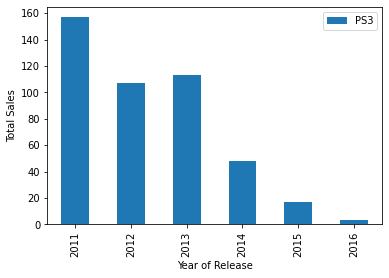

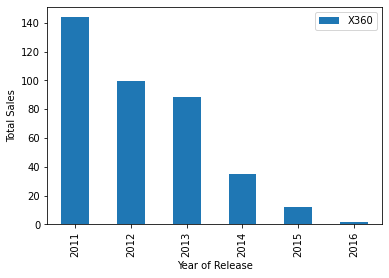

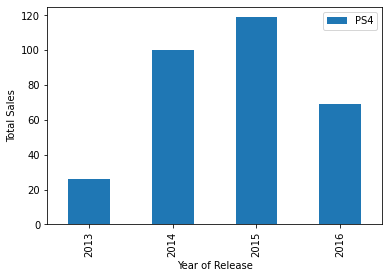

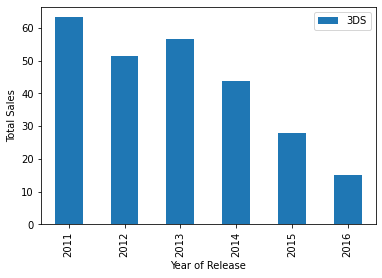

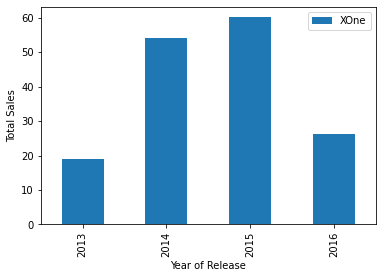

In [54]:
sales_dist_slice(sales_platform_slice.index[0:5])

PS4 and XOne seem to be on the rise, which makes sense as they are the most recent. The older platforms, namely the PS3, the X360, and the 3DS, appear to be waining in sales.

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;🔧<br>
Please use just a slice of recent data. Which platforms are leading in sales? Which ones are shrinking?
</div>

<div class="alert btn-primary"><b>Student comment:</b><br>   Modified function for sliced data and description   </div>

<div class="alert alert-success"><b>Reviewer's comment 2</b>&nbsp;✔️</div>

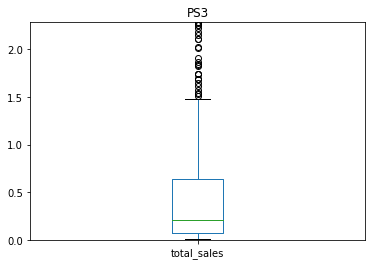

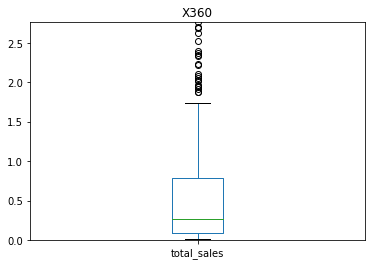

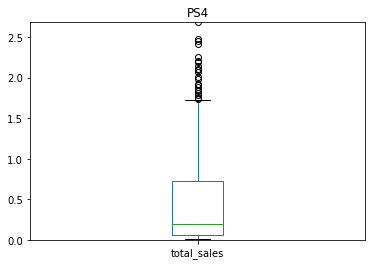

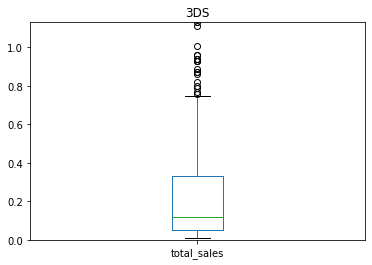

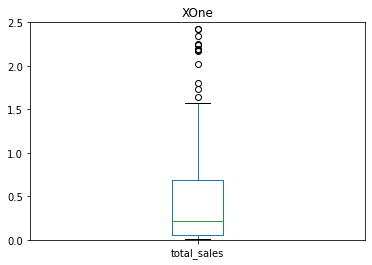

In [55]:
for platform in sales_platform_slice.index[0:5]:
    data = df_slice.query('platform == @platform').total_sales
    data.plot(kind = 'box')
    plt.ylim(0, 4*(data.quantile(0.75)-data.quantile(0.25)))
    plt.title(platform)
    plt.show()
   

<div class="alert alert-warning"><b>Reviewer's comment 2</b>&nbsp;⚠️<br>
This is not a valid way to compare sales of different platforms — boxplots are away from each other and have a different scales.

The sorting of values does not work correctly, it is better to use the seaborn library, where the order of categories is easier to specify.
</div>

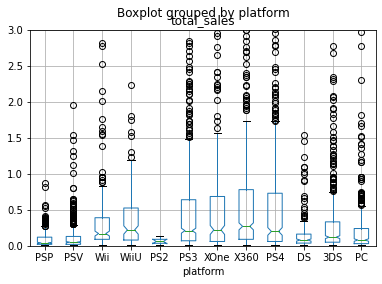

In [56]:
# REVIEWER CODE 2
positions = df_slice.groupby('platform').agg({"total_sales":"median"}).reset_index().sort_values('total_sales',ascending=False).index + 1

df_slice.boxplot(column='total_sales',by='platform',notch=True, positions=positions)
plt.ylim((0,3));

According to the boxplots of the top 5 platform in our specified range of 2011 onwards, the 3DS lags behind the rest. The other platforms show a similar right-skewed distribution with several outliers. Concerning the PS4 and the XOne, our two platforms of interest which may rise in sales in the future, the plot for the PS4 display many more outliers. this could indicate that the PS4 can result in more profitable margins.

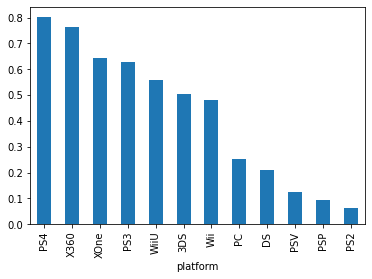

In [57]:
df_slice.groupby('platform')['total_sales'].mean().sort_values(ascending = False).plot(kind='bar');

When looking at the average sales per platform during our timeframe, we can see that our two platforms of interest are within the top 3. The PS4 takes the top spot and the XOne takes the third spot, with X360 wedged in the middle. This supports the claim that the upper outliers for the PS4 influence the average of all sails, and that the platform has a significant market share. The XOne, being third in the list and not far from the PS4, is also a good contendor for platform sales. Although the X360 takes the 2nd spot, it has been found before that the trend of sales for the console is declining, so this data is from the earlier years within the 5 year time frame between 2011 and 2016.

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;🔧<br>
Above we see only one boxplot. The plot must be broken down by platform. We need several boxplots — one for a platform. Try to use the "<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html'>by=</a>" parameter. You may also need <tt>plt.ylim</tt>
    
Describe your findings. What about average sales on various platforms?
</div>

<div class="alert btn-primary"><b>Student comment:</b><br>   Added plots and explanations   </div>

### Effect of reviews for PS4

In [58]:
df_slice.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

#### Critic Score

In [59]:
df_ps4 = df_slice.query('platform == "PS4"')

The correlation between the critic score and total sales is: 0.3387064530024634


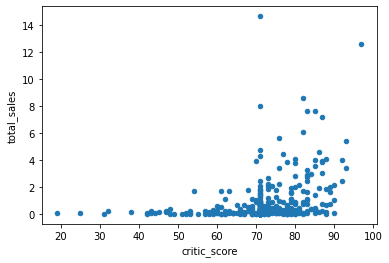

In [60]:
df_ps4.plot.scatter(x = 'critic_score', y = 'total_sales');
print('The correlation between the critic score and total sales is:', df_ps4['critic_score'].corr(df_ps4.total_sales))

At 0.34, there is a moderate positive correlation between the critic score and total sales.

#### User Score

The correlation between the user score and total sales is: -0.06275557891282788


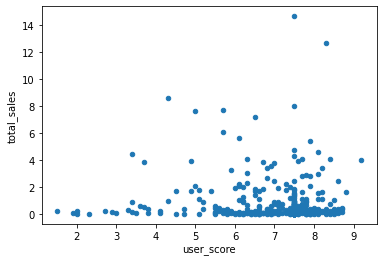

In [61]:
df_ps4.plot.scatter(x = 'user_score', y = 'total_sales');
print('The correlation between the user score and total sales is:', df_ps4['user_score'].corr(df_ps4.total_sales))

Interestingly, there is a very weak negative correlation between user score and total sales, with a value of -0.063. Although it is negative, it is very close to 0, so it is not a good predictor. 

<div class="alert alert-success"><b>Reviewer's comment</b>&nbsp;✔️ you may use correlation with <tt>groupby</tt> as any other aggregation function</div>

In [62]:
# REVIEWER CODE
df_slice.groupby('platform')[['critic_score','user_score','total_sales']].corr().style.background_gradient()

### Compare PS4 games reviews with other platforms

In [63]:
df_ps4.name

31            Call of Duty: Black Ops 3
42                   Grand Theft Auto V
77                              FIFA 16
87         Star Wars Battlefront (2015)
92       Call of Duty: Advanced Warfare
                      ...              
16500                       Root Letter
16503                 Shin Hayarigami 2
16526                        Dungeons 2
16530           Carmageddon: Max Damage
16585     Farming 2017 - The Simulation
Name: name, Length: 392, dtype: object

In [64]:
df_slice_ps4_games = df_slice[df_slice['name'].isin(df_ps4.name)]
df_slice_ps4_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,71.0,7.5,unknown,9.18
75,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,5.05,2.79,0.10,0.85,96.0,8.4,M,8.79
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,71.0,7.5,unknown,7.98


The correlation between the critic score and total sales is: 0.30439057195338437


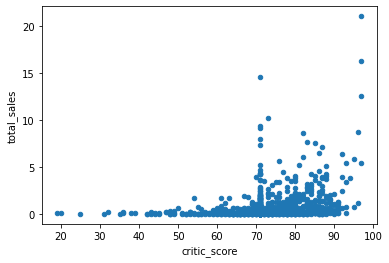

In [65]:
df_slice_ps4_games.plot.scatter(x = 'critic_score', y = 'total_sales');
print('The correlation between the critic score and total sales is:', df_slice_ps4_games['critic_score'].corr(df_slice_ps4_games.total_sales))

The correlation between the user score and total sales is: -0.07257372041291275


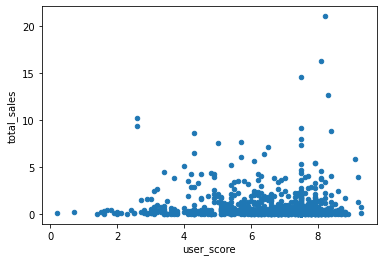

In [66]:
df_slice_ps4_games.plot.scatter(x = 'user_score', y = 'total_sales');
print('The correlation between the user score and total sales is:', df_slice_ps4_games['user_score'].corr(df_slice_ps4_games.total_sales))

Similar correlations for the same game across all the top platforms from 2011 onwards

<div class="alert alert-success"><b>Reviewer's comment</b>&nbsp;✔️</div>

### Genre

In [67]:
genre_sales = df_slice.groupby('genre')['total_sales'].mean().sort_values(ascending = False).to_frame()
genre_sales

,total_sales
genre,
Shooter,1.224650
Platform,0.726885
Sports,0.609640
Role-Playing,0.528237
Racing,0.490611
Action,0.439559
Fighting,0.420755
Misc,0.371787
Simulation,0.369559


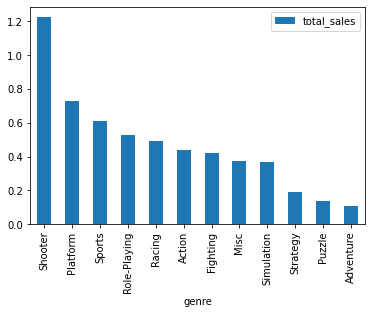

In [68]:
genre_sales.plot(kind = 'bar');

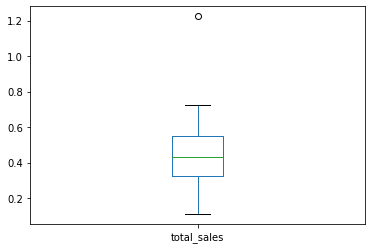

In [69]:
genre_sales.plot(kind = 'box');

The top selling game per genre, on average, is Shooter far above the rest, followed by Platform, and then Sports. The Shooter genre is an outlier, meaning it is significantly higher than the rest of the data. The genres with the lowest sales are Strategy, Puzzle, and Adventure, in descending order. 

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;🔧<br>
To find profitable genres, please plot not the sum of the total sales, as you have done above, but typical (mean or median) sales of one game in each genre. Describe differences and genres with low sales.
</div>

<div class="alert btn-primary"><b>Student comment:</b><br>   Plotted sales per genre by mean, modified description   </div>

<div class="alert alert-success"><b>Reviewer's comment 2</b>&nbsp;📝<br>
It seems that shooters are a good choice for our online store. There are many action games, but they show quite average success.
</div>

### Regions Analysis

#### Platform

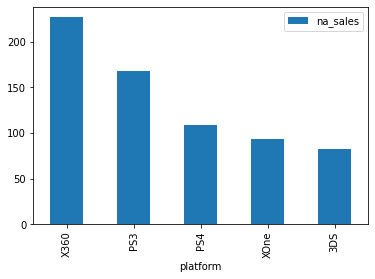

In [70]:
NA_sales = df_slice.groupby('platform')['na_sales'].sum().sort_values(ascending = False).to_frame()
NA_sales[0:5].plot(kind = 'bar');

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;⚠️<br>
Boxplot is not informative because it shows the distribution of five values, each of which we see above.
</div>

<div class="alert btn-primary"><b>Student comment:</b><br>   True, I've removed them now to allow the focus on the bar charts   </div>

<div class="alert alert-success"><b>Reviewer's comment 2</b>&nbsp;✔️</div>

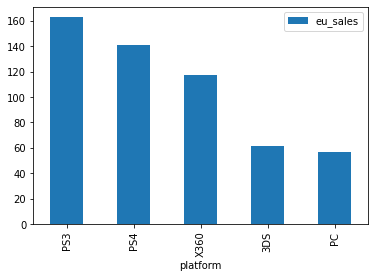

In [71]:
EU_sales = df_slice.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).to_frame()
EU_sales[0:5].plot(kind = 'bar');

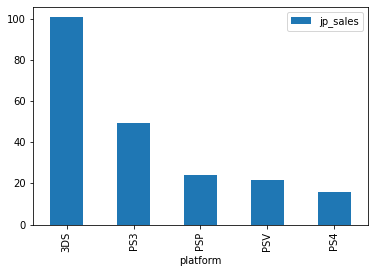

In [72]:
JP_sales = df_slice.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).to_frame()
JP_sales[0:5].plot(kind = 'bar');

The top platforms within NA make up more of a market share than the top platforms for the EU or JP. The very top platform within JP, the 3DS, is considered an outlier within JP data, but still only falls within the bottom 50% of top platform market shares within EU. 

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;💡<br>
If you need to compare values, it is convenient to display them on the same graph.
</div>

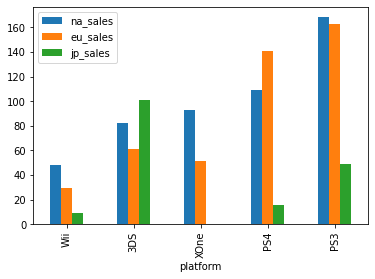

In [73]:
# REVIEWER CODE
df_slice.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum().sort_values('na_sales')[-6:-1].plot.bar();

#### Genre

In [74]:
NA_genre = df_slice.groupby('genre')['na_sales'].sum().sort_values(ascending = False).to_frame()
EU_genre = df_slice.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).to_frame()
JP_genre = df_slice.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).to_frame()

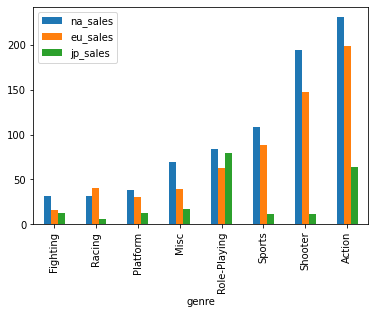

In [75]:
top_5_genres = NA_genre[0:5].index.union(EU_genre[0:5].index).union(JP_genre[0:5].index)

df_slice.query('genre in @top_5_genres').groupby('genre')[['na_sales','eu_sales','jp_sales']].sum().sort_values('na_sales').plot.bar();

A similar trend is observed when parsing the genres as was observed with the top platforms. The top five genres between NA and EU have a similar distribution, but NA is slightly greater. One observation to note is that the top four genres between the two are identical in name and order. When it comes to JP, the top two genres of "Role-Playing" and "Action" lead by a large margin within the dataset. However, once again, all the data of JP falls within the bottom 50% of data within the other two regions.

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;💡<br>
Here you can also choose a more compact and informative plot:
</div>

<div class="alert btn-primary"><b>Student comment:</b><br>  Added above   </div>

#### Rating

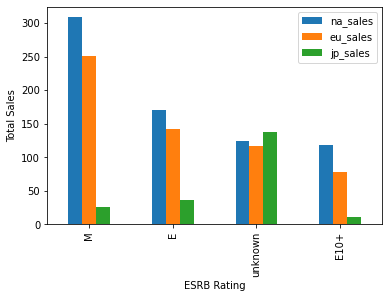

In [76]:
df_slice.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum().sort_values('na_sales', ascending = False)[-6:-1].plot.bar();
plt.xlabel('ESRB Rating');
plt.ylabel('Total Sales');

The distribution of ratings according to sales within NA are higher than that of EU, but the trend is similar. Japan might have a large percentage of unknown ESRB ratings due to the fact that ESRB ratings are primarily an English language undertaking. There may be many games that have not been translated to the ESRB rating system. 

<div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;🔧<br>
Please sort the values above before you plot them (to sort categories in the graphs). 
    
Also, please write why the top Japan ESRB rating is "unknown". 
</div>

<div class="alert btn-primary"><b>Student comment:</b><br>   Overlayed charts, sorted, and described the ESRB rating   </div>

<div class="alert alert-success"><b>Reviewer's comment 2</b>&nbsp;✔️<br>
Yes, ESRB is not substantial for Japan game market.
</div>

## Testing Hypotheses:

We will test on a 95% confidence interval, as this is generally the most common use case and is suitable for our study.

### Test 1: Xbox One and PC

Null Hypothesis: The average user ratings of the Xbox One (XOne) and PC platforms are the same.

Alternative Hypothesis: The average user ratings of the Xbox One (XOne) and PC platforms are different.

In [77]:
xbox_pc_slice = df_slice.query('platform == ("XOne", "PC")')
xbox_pc_slice

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,71.0,7.5,unknown,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.00,0.54,88.0,4.0,M,5.14
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,71.0,7.5,M,0.01
16678,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,71.0,7.5,T,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01


In [78]:
alpha = 0.05  
results = st.ttest_ind(xbox_pc_slice[xbox_pc_slice['platform']== "XOne"]['user_score'],
                       xbox_pc_slice[xbox_pc_slice['platform']== "PC"]['user_score'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: 0.3541996352549899
We can't reject the null hypothesis


There is no significant difference between the average user scores for Xbox One and PC.

### Test 2: Action and Sports

Null Hypothesis: The average user ratings of the Action and Sports genres are the same.

Alternative Hypothesis: The average user ratings of the Action and Sports genres are different.

In [79]:
alpha = 0.05  
results = st.ttest_ind(xbox_pc_slice[xbox_pc_slice['genre']== "Action"]['user_score'],
                       xbox_pc_slice[xbox_pc_slice['genre']== "Sports"]['user_score'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: 3.487900931898298e-09
We reject the null hypothesis


There is in fact a significant difference between the average user scores for the Action and Sports genres. 

<div class="alert alert-success"><b>Reviewer's comment</b>&nbsp;✔️<br>
Correct hypotheses formulation. Calculations are carried out and interpreted accurately. The current data period is selected.
</div>

## Conclusion

Overall, some distinct insights were found from processing the data. First, it was observed that generally, successful platforms rise to success within 5 years, and then fade within another 5 years. So, when projecting for 2017, data primarily from the past 5 years (2011-2016) was used in order to forecast data that were on the rise.

After choosing this timeframe, it was found that the PS4 and Xbox One (XOne) platforms were growing, which makes sense as they are the newest platform generation. The relationship between user/critic scores and the total sales was evaluated on the PS4 console. It was found that there was a moderate positive correlation between critic scores and total sales for the PS4, and almost no correlation for user scores. The same observations were found when looking at the same games across the other platforms. 

Data by region were also evaluated. It was found that NA and EU follow similar patterns regarding the top platforms, the top genres, and ESRB ratings. Although the top platforms were different, the market share and distribution were similar between the two, with EU's market share being slightly lower. The top genres, however, were almost identical in both regions. The ESRB ratings were also almost identical, with Mature leading. Japan's market share of top platforms and genres were much lower than the other two regions, but it should be noted that the 3DS held a significantly higher market share than the other platforms within the region. The distribution of ESRB ratings for Japan differed from NA and EU, but this may be due to the fact that the majority of ratings in the region were unknown. 

Finally, a couple of hypotheses were tested. The first hypothesis tested was that the average user scores between Xbox One and PC were the same. This was found to be true, according to a ttest on the equality of two population means. The next hypothesis tested was that the average user scores between the Action and Sports genres are different. This was also found to be true by the same type of test. 

With these findings in mind, it may be useful to focus on NA and EU for sales, and particularly on the Xbox One and PS4 platforms. The top selling genres in these two regions are Action and Shooter, and the top rating by a large margin is Mature. If dealing with Japan, the 3DS is a platform that should be taken into account, and while Shooter is the second top genre, Role-Playing leads in the region.

<div class="alert alert-success"><b>Reviewer's comment</b>&nbsp;✔️<br>
Intermediate results are compiled into conclusions.
</div><div class="alert alert-warning"><b>Reviewer's comment</b>&nbsp;⚠️<br>List for self-control:
<s>
* explain reasons why there are some missing scores in the data
* make a graph about how many games were released in different years
* find platforms that used to be popular but now have zero sales
* use only recent data then finding which platforms are leading in sales. Add some conclusions
* build a box plot for the global sales of all games, broken down by platform
* find profitable genres by using median or mean sales
* write why the top Japan ESRB rating is "unknown"
</div>